In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [136]:
df = pd.read_csv('./comprar_alquilar.csv')
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [137]:
df.shape

(202, 10)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [139]:
df.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

In [140]:
df.groupby('comprar').size()

comprar
0    135
1     67
dtype: int64

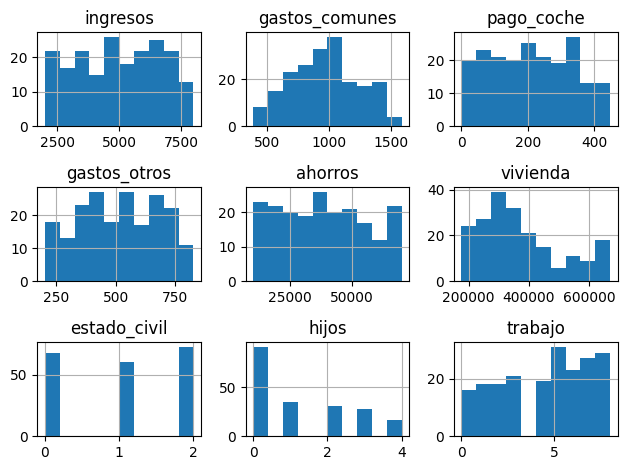

In [141]:
df.drop(['comprar'],axis=1).hist()
plt.tight_layout();

In [142]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [143]:
x = df.drop(['comprar'],axis=1)
y = df['comprar']

# En lugar de usar todas las columnas, seleccionamos las k mejores
best = SelectKBest(k=7)
x_best = best.fit_transform(x,y)
selected = best.get_support(indices=True)
x.columns[selected]

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'ahorros', 'vivienda',
       'hijos', 'trabajo'],
      dtype='object')

In [144]:
x_new = x.columns[selected]

df[x_new].corr()

,ingresos,gastos_comunes,pago_coche,ahorros,vivienda,hijos,trabajo
ingresos,1.000000,0.560211,-0.109780,0.712889,0.614721,-0.024483,-0.038852
gastos_comunes,0.560211,1.000000,-0.054400,0.209414,0.204781,-0.072321,-0.079095
pago_coche,-0.109780,-0.054400,1.000000,-0.193299,-0.094631,-0.044858,0.018946
ahorros,0.712889,0.209414,-0.193299,1.000000,0.605836,0.001445,-0.023829
vivienda,0.614721,0.204781,-0.094631,0.605836,1.000000,-0.141924,-0.211790
hijos,-0.024483,-0.072321,-0.044858,0.001445,-0.141924,1.000000,0.699916
trabajo,-0.038852,-0.079095,0.018946,-0.023829,-0.211790,0.699916,1.000000


<Axes: >

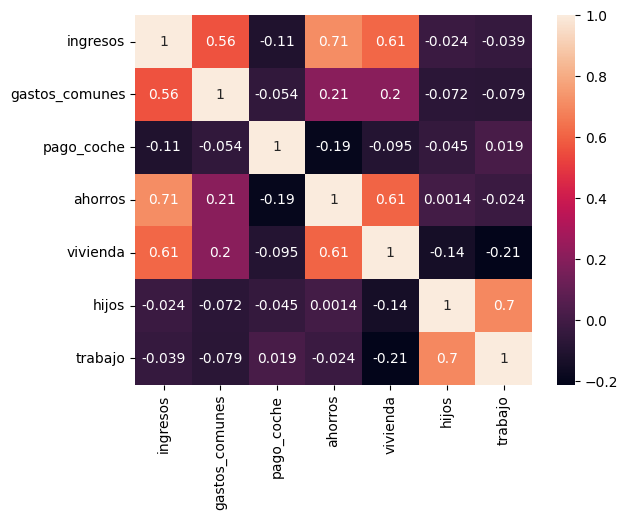

In [145]:
sns.heatmap(df[x_new].corr(), annot=True)

In [146]:
scal = MinMaxScaler()
df[['ingresos',	'gastos_comunes',	'pago_coche',	'gastos_otros',	'ahorros', 'vivienda']] = scal.fit_transform(df[['ingresos',	'gastos_comunes',	'pago_coche',	'gastos_otros',	'ahorros', 'vivienda']])

In [147]:
x = df[['ingresos', 'gastos_comunes', 'pago_coche', 'ahorros', 'vivienda','hijos', 'trabajo']]
y = df['comprar']

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [150]:
accuracy_score(y_test,y_pred)

0.7804878048780488

In [151]:
confusion_matrix(y_test,y_pred)

array([[23,  1],
       [ 8,  9]], dtype=int64)